In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [30]:
def summary_stats(_a, _b):
    '''Compute summary statistics for the difference between two sets.
    Input two flattened (1-D) arrays with NaN values removed'''
    
    # remove nan values
    a = _a[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    b = _b[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    
    if (len(a) == 0) or (len(b) == 0):
        diff = np.array([np.nan])
        slope, intercept, r_value, p_value, std_err = np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        # for difference stats
        diff = b - a
        # for linear regression stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(a, b)
    
    # populate dict with summary stats
    summary_stats_dict = {
        #'diff' : diff ,
        'min_diff' : np.nanmin( diff ),
        'max_diff' : np.nanmax( diff ),
        'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
        'n' : len(diff) ,
        'mean_diff' : np.nanmean( diff ),
        'median_diff' : np.nanmedian( diff ),
        'mean_squared_diff' : np.nanmean( diff**2 ),
        'rms_diff' : np.sqrt( np.nanmean( diff**2 ) ),
        'std_diff' : np.nanstd( diff ),
        'slope' : slope,
        'intercept' : intercept,
        'r_value' : r_value,
        'r_squared' : r_value**2,
        'p_value' : p_value,
        'std_err' : std_err
        }
    
    return summary_stats_dict 

In [31]:
def find_hour_start(df, n_hours=1):

    '''For a dataframe with a datetime index, start at the hour of the first timestep,
       then find the index of the next timestep that is n_hours greater than the current hour.
       Return a dataframe with only the values at n_hour steps from the start point.'''

    return_indices = []
    for i, idx_value in enumerate(df.index):
        
        current_hour = idx_value.hour
        
        if i == 0:
            return_indices.append(i)
            previous_hour = current_hour

        if current_hour == previous_hour + n_hours:
            return_indices.append(i)
            previous_hour = current_hour
       
    return df.iloc[return_indices]

---
Read in ground data

In [32]:
df_merged = pd.read_csv(r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\GOES-16_ABI_data\merged_datasets.csv')
df_merged.set_index(pd.to_datetime(df_merged.datetime), inplace=True)

---
Read in ABI data

In [33]:
path = r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\Paper 2a - snowex data\data\\'


# GOES-16 timeseries filepaths

pixelA_g16_lst = pd.read_csv(path + 'pixelA_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelA_g16_rad = pd.read_csv(path + 'pixelA_GOES-16_ABI_2020_02_07-14_R.csv')

pixelB_g16_lst = pd.read_csv(path + 'pixelB_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelB_g16_rad = pd.read_csv(path + 'pixelB_GOES-16_ABI_2020_02_07-14_R.csv')

pixelC_g16_rad = pd.read_csv(path + 'pixelC_GOES-16_ABI_2020_02_07-14_R.csv')
pixelC_g16_lst = pd.read_csv(path + 'pixelC_GOES-16_ABI_2020_02_01-15_LST.csv')

pixelD_g16_lst = pd.read_csv(path + 'pixelD_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelD_g16_rad = pd.read_csv(path + 'pixelD_GOES-16_ABI_2020_02_07-14_R.csv')

pixelE_g16_lst = pd.read_csv(path + 'pixelE_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelE_g16_rad = pd.read_csv(path + 'pixelE_GOES-16_ABI_2020_02_07-14_R.csv')

pixelNW_g16_lst = pd.read_csv(path + 'pixelNW_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelNW_g16_rad = pd.read_csv(path + 'pixelNW_GOES-16_ABI_2020_02_07-14_R.csv')

# GOES-17 timeseries filepaths

pixelA_g17_lst = pd.read_csv(path + 'pixelA_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelA_g17_rad = pd.read_csv(path + 'pixelA_GOES-17_ABI_2020_02_01-15_R.csv')

pixelB_g17_lst = pd.read_csv(path + 'pixelB_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelB_g17_rad = pd.read_csv(path + 'pixelB_GOES-17_ABI_2020_02_01-15_R.csv')

pixelC1_g17_lst = pd.read_csv(path + 'pixelC1_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelC1_g17_rad = pd.read_csv(path + 'pixelC1_GOES-17_ABI_2020_02_01-15_R.csv')

pixelC2_g17_rad = pd.read_csv(path + 'pixelC2_GOES-17_ABI_02_01-15_R.csv')
pixelC2_g17_lst = pd.read_csv(path + 'pixelC2_GOES-17_ABI_2020_02_01-15_LST.csv')

pixelD_g17_lst = pd.read_csv(path + 'pixelD_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelD_g17_rad = pd.read_csv(path + 'pixelD_GOES-17_ABI_2020_02_01-15_R.csv')

pixelE_g17_lst = pd.read_csv(path + 'pixelE_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelE_g17_rad = pd.read_csv(path + 'pixelE_GOES-17_ABI_2020_02_01-15_R.csv')

pixelNW_g17_lst = pd.read_csv(path + 'pixelNW_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelNW_g17_rad = pd.read_csv(path + 'pixelNW_GOES-17_ABI_2020_02_01-15_R.csv')

In [34]:
df_list = [pixelA_g16_lst, pixelA_g16_rad, pixelB_g16_lst, pixelB_g16_rad, pixelC_g16_lst, pixelC_g16_rad, pixelD_g16_lst, pixelD_g16_rad, pixelE_g16_lst, pixelE_g16_rad, pixelNW_g16_lst, pixelNW_g16_rad,
           pixelA_g17_lst, pixelA_g17_rad, pixelB_g17_lst, pixelB_g17_rad, pixelC1_g17_lst, pixelC1_g17_rad, pixelC2_g17_rad, pixelC2_g17_lst, pixelD_g17_lst, pixelD_g17_rad, pixelE_g17_lst, pixelE_g17_rad, pixelNW_g17_lst, pixelNW_g17_rad]

for df in df_list:
    if 't' in df.columns:
        df['datetime'] = pd.to_datetime(df.t)
    elif 'time' in df.columns:
        df['datetime'] = pd.to_datetime(df.time)
    df.set_index('datetime', inplace=True)

---
Select a cloud-free period to compare - **Feb 8**

In [111]:
starttime, endtime = '2020-02-08 13:45', '2020-02-09 01:30'

C:\Users\steve\AppData\Local\Temp\ipykernel_24848\944972905.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  pixelA_g16_rad_sliced = pixelA_g16_rad[starttime:endtime]
C:\Users\steve\AppData\Local\Temp\ipykernel_24848\944972905.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  pixelA_g17_rad_sliced = pixelA_g17_rad[starttime:endtime]


tss_range = 9.274000000000001
ta_range = 5.536999999999978
g16_b13_tb_range = 12.46783447265625
g16_b14_tb_range = 13.81414794921875
g17_b13_tb_range = 11.9774169921875
g17_b14_tb_range = 13.605987548828125
time_of_max_tss = ['2020-02-08 20:26:00']
time_of_min_tss = ['2020-02-08 13:46:00']
time_of_max_ta = ['2020-02-08 22:01:00']
time_of_min_ta = ['2020-02-08 13:46:00']
g16_time_of_max_b13_tb = ['2020-02-08 20:51:00']
g16_time_of_max_b14_tb = ['2020-02-08 20:51:00']
g16_time_of_min_b13_tb = ['2020-02-08 15:01:00']
g16_time_of_min_b14_tb = ['2020-02-08 15:01:00']
g17_time_of_max_b13_tb = ['2020-02-08 20:36:00']
g17_time_of_max_b14_tb = ['2020-02-08 20:26:00']
g17_time_of_min_b13_tb = ['2020-02-08 13:56:00']
g17_time_of_min_b14_tb = ['2020-02-08 13:51:00']


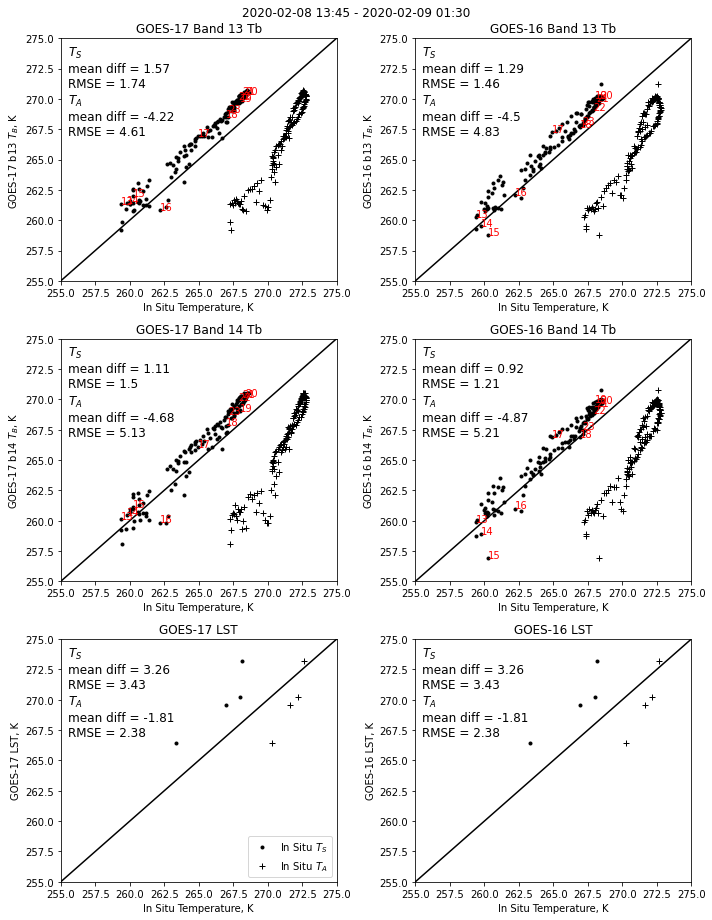

In [112]:
n_hours = 1

pixelA_g16_rad_sliced = pixelA_g16_rad[starttime:endtime]
pixelA_g16_lst_sliced = pixelA_g16_lst[starttime:endtime]

pixelA_g17_rad_sliced = pixelA_g17_rad[starttime:endtime]
pixelA_g17_lst_sliced = pixelA_g17_lst[starttime:endtime]

df_merged_sliced = df_merged[starttime:endtime]

### MERGE DATA ###

df_merged['pixelA_g16_rad_sliced_b13_tb_2km'] = pixelA_g16_rad_sliced.b13_tb_2km
df_merged['pixelA_g16_rad_sliced_b14_tb_2km'] = pixelA_g16_rad_sliced.b14_tb_2km
#idx = [df_merged.index.get_loc(dt, method='nearest', tolerance=[pd.Timedelta('10Min')]) for dt in pixelA_g16_lst.index]
idx16 = df_merged_sliced.index.get_indexer(pixelA_g16_lst.index, method='nearest', tolerance=[pd.Timedelta('30Min')]*len(pixelA_g16_lst.index))
#idx = idx[idx != -1]
df_merged_g16_lst_sliced = df_merged_sliced.loc[df_merged_sliced.index[idx16]]

df_merged['pixelA_g17_rad_sliced_b13_tb_2km'] = pixelA_g17_rad_sliced.b13_tb_2km
df_merged['pixelA_g17_rad_sliced_b14_tb_2km'] = pixelA_g17_rad_sliced.b14_tb_2km
#idx = [df_merged.index.get_loc(dt, method='nearest', tolerance=[pd.Timedelta('10Min')]) for dt in pixelA_g17_lst.index]
idx17 = df_merged_sliced.index.get_indexer(pixelA_g17_lst.index, method='nearest', tolerance=[pd.Timedelta('30Min')]*len(pixelA_g17_lst.index))
#idx = idx[idx != -1]
df_merged_g17_lst_sliced = df_merged_sliced.loc[df_merged_sliced.index[idx17]]

df_merged_sliced = df_merged[starttime:endtime]

### PLOT ###

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,13), tight_layout=True)

plt.suptitle(f'{starttime} - {endtime}')

[ax17_b13, ax16_b13, ax17_b14, ax16_b14, ax17_lst, ax16_lst] = axs.ravel()

ax16_b13.plot(df_merged.rad_avg, df_merged.pixelA_g16_rad_sliced_b13_tb_2km, '.k')
ax16_b13.plot(df_merged.AirTC_20ft_Avg, df_merged.pixelA_g16_rad_sliced_b13_tb_2km, '+k')
_df = find_hour_start(df_merged_sliced, n_hours) # Add text labels for each hour
[ax16_b13.annotate(i.hour, xy=(row.rad_avg, row.pixelA_g16_rad_sliced_b13_tb_2km), fontsize=10, c='r') for i, row in _df.iterrows()]
ax16_b13.set_ylabel('GOES-16 b13 $T_B$, K')
ax16_b13.set_xlabel('In Situ Temperature, K')
ax16_b13.set_title('GOES-16 Band 13 Tb')

ax16_b14.plot(df_merged.rad_avg, df_merged.pixelA_g16_rad_sliced_b14_tb_2km, '.k')
ax16_b14.plot(df_merged.AirTC_20ft_Avg, df_merged.pixelA_g16_rad_sliced_b14_tb_2km, '+k')
_df = find_hour_start(df_merged_sliced, n_hours) # Add text labels for each hour
[ax16_b14.annotate(i.hour, xy=(row.rad_avg, row.pixelA_g16_rad_sliced_b14_tb_2km), fontsize=10, c='r') for i, row in _df.iterrows()]
ax16_b14.set_ylabel('GOES-16 b14 $T_B$, K')
ax16_b14.set_xlabel('In Situ Temperature, K')
ax16_b14.set_title('GOES-16 Band 14 Tb')

ax16_lst.plot(df_merged_g16_lst_sliced.rad_avg[idx16 != -1], pixelA_g16_lst.LST[idx16 != -1], '.k')
ax16_lst.plot(df_merged_g16_lst_sliced.AirTC_20ft_Avg[idx16 != -1], pixelA_g16_lst.LST[idx16 != -1], '+k')
ax16_lst.set_ylabel('GOES-16 LST, K')
ax16_lst.set_xlabel('In Situ Temperature, K')
ax16_lst.set_title('GOES-16 LST')

ax17_b13.plot(df_merged.rad_avg, df_merged.pixelA_g17_rad_sliced_b13_tb_2km, '.k')
ax17_b13.plot(df_merged.AirTC_20ft_Avg, df_merged.pixelA_g17_rad_sliced_b13_tb_2km, '+k')
_df = find_hour_start(df_merged_sliced, n_hours) # Add text labels for each hour
[ax17_b13.annotate(i.hour, xy=(row.rad_avg, row.pixelA_g17_rad_sliced_b13_tb_2km), fontsize=10, c='r') for i, row in _df.iterrows()]
ax17_b13.set_ylabel('GOES-17 b13 $T_B$, K')
ax17_b13.set_xlabel('In Situ Temperature, K')
ax17_b13.set_title('GOES-17 Band 13 Tb')

ax17_b14.plot(df_merged.rad_avg, df_merged.pixelA_g17_rad_sliced_b14_tb_2km, '.k')
ax17_b14.plot(df_merged.AirTC_20ft_Avg, df_merged.pixelA_g17_rad_sliced_b14_tb_2km, '+k')
_df = find_hour_start(df_merged_sliced, n_hours) # Add text labels for each hour
[ax17_b14.annotate(i.hour, xy=(row.rad_avg, row.pixelA_g17_rad_sliced_b14_tb_2km), fontsize=10, c='r') for i, row in _df.iterrows()]
ax17_b14.set_ylabel('GOES-17 b14 $T_B$, K')
ax17_b14.set_xlabel('In Situ Temperature, K')
ax17_b14.set_title('GOES-17 Band 14 Tb')

ax17_lst.plot(df_merged_g17_lst_sliced.rad_avg[idx17 != -1], pixelA_g17_lst.LST[idx17 != -1], '.k', label='In Situ $T_S$')
ax17_lst.plot(df_merged_g17_lst_sliced.AirTC_20ft_Avg[idx17 != -1], pixelA_g17_lst.LST[idx17 != -1], '+k', label='In Situ $T_A$')
ax17_lst.set_ylabel('GOES-17 LST, K')
ax17_lst.set_xlabel('In Situ Temperature, K')
ax17_lst.set_title('GOES-17 LST')
ax17_lst.legend(loc='lower right')

for this_ax in axs.ravel():
    # formatting
    ax_min, ax_max = 255, 275
    this_ax.plot([ax_min, ax_max], [ax_min, ax_max], '-k')
    this_ax.set_xlim((ax_min, ax_max))
    this_ax.set_ylim((ax_min, ax_max))
    # Tss stats
    text_x, text_y = ax_min + .5, ax_max - 4
    x = this_ax.get_lines()[0].get_xdata()
    y = this_ax.get_lines()[0].get_ydata()
    stats_dict = summary_stats(x, y)
    s1 = str(np.round(stats_dict['r_squared'],2))
    s2 = str(np.round(stats_dict['mean_diff'],2))
    s3 = str(np.round(stats_dict['rms_diff'],2))
    this_ax.text(text_x, text_y, f'$T_S$\nmean diff = {s2}\nRMSE = {s3}', fontsize=12)
    # Tair stats
    text_x, text_y = ax_min + .5, ax_max - 8
    x = this_ax.get_lines()[1].get_xdata()
    y = this_ax.get_lines()[1].get_ydata()
    stats_dict = summary_stats(x, y)
    s1 = str(np.round(stats_dict['r_squared'],2))
    s2 = str(np.round(stats_dict['mean_diff'],2))
    s3 = str(np.round(stats_dict['rms_diff'],2))
    this_ax.text(text_x, text_y, f'$T_A$\nmean diff = {s2}\nRMSE = {s3}', fontsize=12)
     
    
plt.savefig('abi_vs_ground_feb8.jpg')


################## how does the DTR from GOES compare to insitu data?
tss_max, tss_min = np.nanmax( df_merged_sliced.rad_avg.values ), np.nanmin( df_merged_sliced.rad_avg.values )
ta_max, ta_min = np.nanmax( df_merged_sliced.AirTC_20ft_Avg.values ), np.nanmin( df_merged_sliced.AirTC_20ft_Avg.values )
tss_range = tss_max - tss_min
ta_range =  ta_max - ta_min  
print(f'tss_range = {tss_range}')
print(f'ta_range = {ta_range}')

g16_b13_tb_max, g16_b13_tb_min = np.nanmax( df_merged.pixelA_g16_rad_sliced_b13_tb_2km.values ), np.nanmin( df_merged.pixelA_g16_rad_sliced_b13_tb_2km.values )
g16_b14_tb_max, g16_b14_tb_min = np.nanmax( df_merged.pixelA_g16_rad_sliced_b14_tb_2km.values ), np.nanmin( df_merged.pixelA_g16_rad_sliced_b14_tb_2km.values )
g16_b13_tb_range =  g16_b13_tb_max - g16_b13_tb_min
g16_b14_tb_range = g16_b14_tb_max - g16_b14_tb_min
print(f'g16_b13_tb_range = {g16_b13_tb_range}')
print(f'g16_b14_tb_range = {g16_b14_tb_range}')

g17_b13_tb_max, g17_b13_tb_min = np.nanmax( df_merged.pixelA_g17_rad_sliced_b13_tb_2km.values ), np.nanmin( df_merged.pixelA_g17_rad_sliced_b13_tb_2km.values )
g17_b14_tb_max, g17_b14_tb_min = np.nanmax( df_merged.pixelA_g17_rad_sliced_b14_tb_2km.values ), np.nanmin( df_merged.pixelA_g17_rad_sliced_b14_tb_2km.values )
g17_b13_tb_range = g17_b13_tb_max - g17_b13_tb__min
g17_b14_tb_range = g17_b14_tb_max - g17_b14_tb__min
print(f'g17_b13_tb_range = {g17_b13_tb_range}')
print(f'g17_b14_tb_range = {g17_b14_tb_range}')

################# how does the timing of min/max compare between GOES and insitu data?
time_of_max_tss = df_merged_sliced[df_merged_sliced.rad_avg == tss_max].datetime
time_of_min_tss = df_merged_sliced[df_merged_sliced.rad_avg == tss_min].datetime
time_of_max_ta = df_merged_sliced[df_merged_sliced.AirTC_20ft_Avg == ta_max].datetime
time_of_min_ta = df_merged_sliced[df_merged_sliced.AirTC_20ft_Avg == ta_min].datetime
print(f'time_of_max_tss = {time_of_max_tss.values}')
print(f'time_of_min_tss = {time_of_min_tss.values}')
print(f'time_of_max_ta = {time_of_max_ta.values}')
print(f'time_of_min_ta = {time_of_min_ta.values}')

g16_time_of_max_b13_tb = df_merged[df_merged.pixelA_g16_rad_sliced_b13_tb_2km == g16_b13_tb_max].datetime
g16_time_of_max_b14_tb = df_merged[df_merged.pixelA_g16_rad_sliced_b14_tb_2km == g16_b14_tb_max].datetime
g16_time_of_min_b13_tb = df_merged[df_merged.pixelA_g16_rad_sliced_b13_tb_2km == g16_b13_tb_min].datetime
g16_time_of_min_b14_tb = df_merged[df_merged.pixelA_g16_rad_sliced_b14_tb_2km == g16_b14_tb_min].datetime
print(f'g16_time_of_max_b13_tb = {g16_time_of_max_b13_tb.values}')
print(f'g16_time_of_max_b14_tb = {g16_time_of_max_b14_tb.values}')
print(f'g16_time_of_min_b13_tb = {g16_time_of_min_b13_tb.values}')
print(f'g16_time_of_min_b14_tb = {g16_time_of_min_b14_tb.values}')

g17_time_of_max_b13_tb = df_merged[df_merged.pixelA_g17_rad_sliced_b13_tb_2km == g17_b13_tb_max].datetime
g17_time_of_max_b14_tb = df_merged[df_merged.pixelA_g17_rad_sliced_b14_tb_2km == g17_b14_tb_max].datetime
g17_time_of_min_b13_tb = df_merged[df_merged.pixelA_g17_rad_sliced_b13_tb_2km == g17_b13_tb_min].datetime
g17_time_of_min_b14_tb = df_merged[df_merged.pixelA_g17_rad_sliced_b14_tb_2km == g17_b14_tb_min].datetime
print(f'g17_time_of_max_b13_tb = {g17_time_of_max_b13_tb.values}')
print(f'g17_time_of_max_b14_tb = {g17_time_of_max_b14_tb.values}')
print(f'g17_time_of_min_b13_tb = {g17_time_of_min_b13_tb.values}')
print(f'g17_time_of_min_b14_tb = {g17_time_of_min_b14_tb.values}')


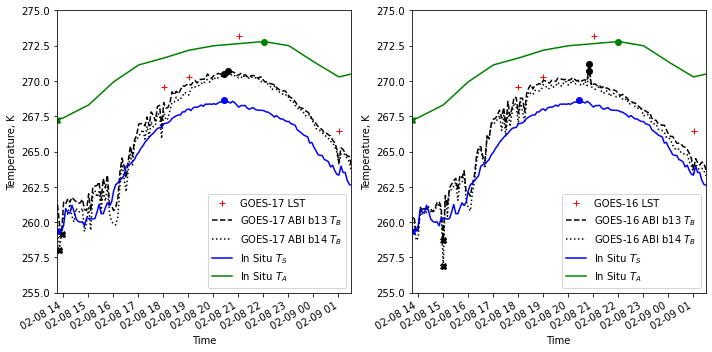

In [115]:
############## plot timeseries for one pixel
fig, axs = plt.subplots(nrows=1, ncols= 2, figsize=(10,5), tight_layout=True)

[axA17, axA16] = axs.ravel()


### Pixel A

# GOES-16
pixelA_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axA16, label='GOES-16 LST')
pixelA_g16_rad.b13_tb_2km.plot(ax=axA16, c='k', linestyle='--', label='GOES-16 ABI b13 $T_B$')
pixelA_g16_rad.b14_tb_2km.plot(ax=axA16, c='k', linestyle=':',  label='GOES-16 ABI b14 $T_B$')
df_merged.rad_avg.plot(ax=axA16, c='b', label='In Situ $T_S$')
df_merged.AirTC_20ft_Avg.plot(ax=axA16, c='g', label='In Situ $T_A$')
axA16.plot([np.datetime64(g16_time_of_max_b13_tb[0])], [g16_b13_tb_max], c='k', linestyle='none', marker='o')
axA16.plot([np.datetime64(g16_time_of_min_b13_tb[0])], [g16_b13_tb_min], c='k', linestyle='none', marker='X')
axA16.plot([np.datetime64(g16_time_of_max_b14_tb[0])], [g16_b14_tb_max], c='k', linestyle='none', marker='o')
axA16.plot([np.datetime64(g16_time_of_min_b14_tb[0])], [g16_b14_tb_min], c='k', linestyle='none', marker='X')


# GOES-17
pixelA_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axA17, label='GOES-17 LST')
pixelA_g17_rad.b13_tb_2km.plot(ax=axA17, c='k', linestyle='--', label='GOES-17 ABI b13 $T_B$')
pixelA_g17_rad.b14_tb_2km.plot(ax=axA17, c='k', linestyle=':',  label='GOES-17 ABI b14 $T_B$')
df_merged.rad_avg.plot(ax=axA17, c='b', label='In Situ $T_S$')
df_merged.AirTC_20ft_Avg.plot(ax=axA17, c='g', label='In Situ $T_A$')
axA17.plot([np.datetime64(g17_time_of_max_b13_tb[0])], [g17_b13_tb_max], c='k', linestyle='none', marker='o')
axA17.plot([np.datetime64(g17_time_of_min_b13_tb[0])], [g17_b13_tb_min], c='k', linestyle='none', marker='X')
axA17.plot([np.datetime64(g17_time_of_max_b14_tb[0])], [g17_b14_tb_max], c='k', linestyle='none', marker='o')
axA17.plot([np.datetime64(g17_time_of_min_b14_tb[0])], [g17_b14_tb_min], c='k', linestyle='none', marker='X')


# formatting
for this_ax in axs.ravel():
    this_ax.plot([np.datetime64(time_of_max_tss[0])], [tss_max], c='b', linestyle='none', marker='o')
    this_ax.plot([np.datetime64(time_of_min_tss[0])], [tss_min], c='b', linestyle='none', marker='X')
    this_ax.plot([np.datetime64(time_of_max_ta[0])], [ta_max], c='g', linestyle='none', marker='o')
    this_ax.plot([np.datetime64(time_of_min_ta[0])], [ta_min], c='g', linestyle='none', marker='X')
    this_ax.set_ylabel('Temperature, K')
    this_ax.set_xlabel('Time')
    this_ax.set_xlim(pd.Timestamp(starttime), pd.Timestamp(endtime))
    this_ax.set_ylim(255,275)
    this_ax.legend(loc='lower right')

plt.savefig('abi_and_ground_timeline_feb8.jpg')

**Feb 11**

In [116]:
starttime, endtime = '2020-02-11 03:30', '2020-02-12 00:30'

tss_range = 21.68300000000002
ta_range = 10.771000000000015
g16_b13_tb_range = 18.20506286621091
g16_b14_tb_range = 18.987564086914062
g17_b13_tb_range = 6.871307373046875
g17_b14_tb_range = 8.6419677734375
time_of_max_tss = ['2020-02-11 20:11:00']
time_of_min_tss = ['2020-02-11 13:56:00']
time_of_max_ta = ['2020-02-12 00:01:00']
time_of_min_ta = ['2020-02-11 13:01:00']
g16_time_of_max_b13_tb = ['2020-02-11 19:46:00' '2020-02-11 20:01:00']
g16_time_of_max_b14_tb = ['2020-02-11 20:31:00']
g16_time_of_min_b13_tb = ['2020-02-11 13:51:00' '2020-02-11 14:11:00']
g16_time_of_min_b14_tb = ['2020-02-11 14:06:00']
g17_time_of_max_b13_tb = ['2020-02-11 20:56:00']
g17_time_of_max_b14_tb = ['2020-02-11 20:46:00' '2020-02-11 20:56:00' '2020-02-11 21:06:00']
g17_time_of_min_b13_tb = ['2020-02-11 13:56:00' '2020-02-11 14:06:00']
g17_time_of_min_b14_tb = ['2020-02-11 14:21:00']


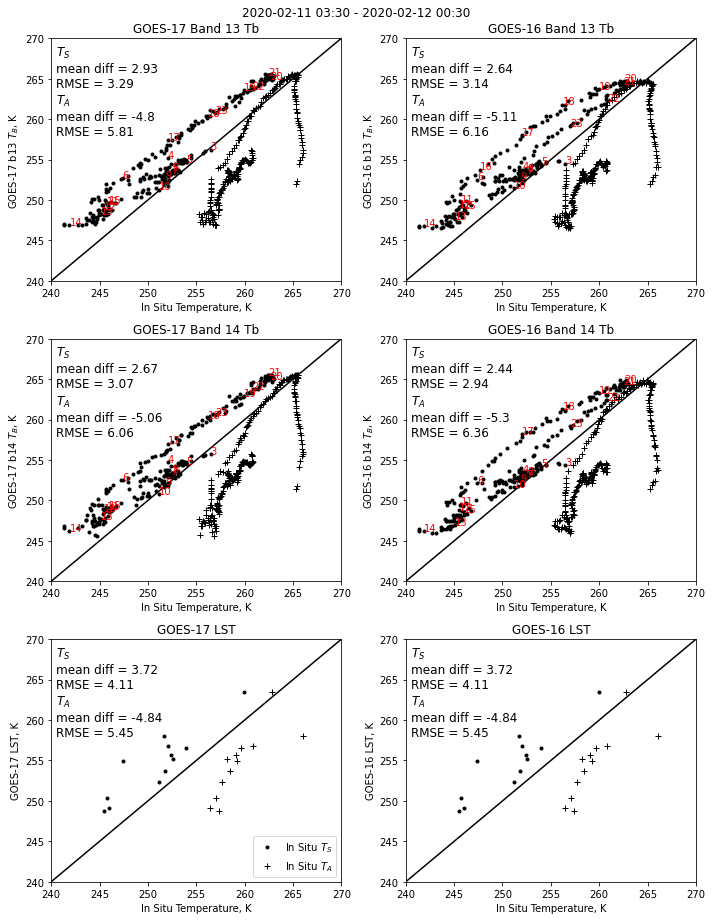

In [117]:
#pixelA_g16_rad_sliced = pixelA_g16_rad[starttime:endtime]
#pixelA_g16_lst_sliced = pixelA_g16_lst[starttime:endtime]
#
#pixelA_g17_rad_sliced = pixelA_g17_rad[starttime:endtime]
#pixelA_g17_lst_sliced = pixelA_g17_lst[starttime:endtime]

df_merged_sliced = df_merged[starttime:endtime]

### MERGE DATA ###

pixelA_g16_rad_sliced = pixelA_g16_rad[df_merged_sliced.datetime[0]:df_merged_sliced.datetime[-1]]
df_merged['pixelA_g16_rad_sliced_b13_tb_2km'] = pixelA_g16_rad_sliced.b13_tb_2km
df_merged['pixelA_g16_rad_sliced_b14_tb_2km'] = pixelA_g16_rad_sliced.b14_tb_2km
#idx = [df_merged.index.get_loc(dt, method='nearest', tolerance=[pd.Timedelta('10Min')]) for dt in pixelA_g16_lst.index]
idx16 = df_merged_sliced.index.get_indexer(pixelA_g16_lst.index, method='nearest', tolerance=[pd.Timedelta('30Min')]*len(pixelA_g16_lst.index))
#idx = idx[idx != -1]
df_merged_g16_lst_sliced = df_merged_sliced.loc[df_merged_sliced.index[idx16]]

pixelA_g17_rad_sliced = pixelA_g17_rad[df_merged_sliced.datetime[0]:df_merged_sliced.datetime[-1]]
df_merged['pixelA_g17_rad_sliced_b13_tb_2km'] = pixelA_g17_rad_sliced.b13_tb_2km
df_merged['pixelA_g17_rad_sliced_b14_tb_2km'] = pixelA_g17_rad_sliced.b14_tb_2km
#idx = [df_merged.index.get_loc(dt, method='nearest', tolerance=[pd.Timedelta('10Min')]) for dt in pixelA_g17_lst.index]
idx17 = df_merged_sliced.index.get_indexer(pixelA_g17_lst.index, method='nearest', tolerance=[pd.Timedelta('30Min')]*len(pixelA_g17_lst.index))
#idx = idx[idx != -1]
df_merged_g17_lst_sliced = df_merged_sliced.loc[df_merged_sliced.index[idx17]]


df_merged_sliced = df_merged[starttime:endtime]


### PLOT ###

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,13), tight_layout=True)

plt.suptitle(f'{starttime} - {endtime}')

[ax17_b13, ax16_b13, ax17_b14, ax16_b14, ax17_lst, ax16_lst] = axs.ravel()

ax16_b13.plot(df_merged.rad_avg, df_merged.pixelA_g16_rad_sliced_b13_tb_2km, '.k')
ax16_b13.plot(df_merged.AirTC_20ft_Avg, df_merged.pixelA_g16_rad_sliced_b13_tb_2km, '+k')
_df = find_hour_start(df_merged_sliced, n_hours) # Add text labels for each hour
[ax16_b13.annotate(i.hour, xy=(row.rad_avg, row.pixelA_g16_rad_sliced_b13_tb_2km), fontsize=10, c='r') for i, row in _df.iterrows()]
ax16_b13.set_ylabel('GOES-16 b13 $T_B$, K')
ax16_b13.set_xlabel('In Situ Temperature, K')
ax16_b13.set_title('GOES-16 Band 13 Tb')

ax16_b14.plot(df_merged.rad_avg, df_merged.pixelA_g16_rad_sliced_b14_tb_2km, '.k')
ax16_b14.plot(df_merged.AirTC_20ft_Avg, df_merged.pixelA_g16_rad_sliced_b14_tb_2km, '+k')
_df = find_hour_start(df_merged_sliced, n_hours) # Add text labels for each hour
[ax16_b14.annotate(i.hour, xy=(row.rad_avg, row.pixelA_g16_rad_sliced_b14_tb_2km), fontsize=10, c='r') for i, row in _df.iterrows()]
ax16_b14.set_ylabel('GOES-16 b14 $T_B$, K')
ax16_b14.set_xlabel('In Situ Temperature, K')
ax16_b14.set_title('GOES-16 Band 14 Tb')

ax16_lst.plot(df_merged_g16_lst_sliced.rad_avg[idx16 != -1], pixelA_g16_lst.LST[idx16 != -1], '.k')
ax16_lst.plot(df_merged_g16_lst_sliced.AirTC_20ft_Avg[idx16 != -1], pixelA_g16_lst.LST[idx16 != -1], '+k')
ax16_lst.set_ylabel('GOES-16 LST, K')
ax16_lst.set_xlabel('In Situ Temperature, K')
ax16_lst.set_title('GOES-16 LST')

ax17_b13.plot(df_merged.rad_avg, df_merged.pixelA_g17_rad_sliced_b13_tb_2km, '.k')
ax17_b13.plot(df_merged.AirTC_20ft_Avg, df_merged.pixelA_g17_rad_sliced_b13_tb_2km, '+k')
_df = find_hour_start(df_merged_sliced, n_hours) # Add text labels for each hour
[ax17_b13.annotate(i.hour, xy=(row.rad_avg, row.pixelA_g17_rad_sliced_b13_tb_2km), fontsize=10, c='r') for i, row in _df.iterrows()]
ax17_b13.set_ylabel('GOES-17 b13 $T_B$, K')
ax17_b13.set_xlabel('In Situ Temperature, K')
ax17_b13.set_title('GOES-17 Band 13 Tb')

ax17_b14.plot(df_merged.rad_avg, df_merged.pixelA_g17_rad_sliced_b14_tb_2km, '.k')
ax17_b14.plot(df_merged.AirTC_20ft_Avg, df_merged.pixelA_g17_rad_sliced_b14_tb_2km, '+k')
_df = find_hour_start(df_merged_sliced, n_hours) # Add text labels for each hour
[ax17_b14.annotate(i.hour, xy=(row.rad_avg, row.pixelA_g17_rad_sliced_b14_tb_2km), fontsize=10, c='r') for i, row in _df.iterrows()]
ax17_b14.set_ylabel('GOES-17 b14 $T_B$, K')
ax17_b14.set_xlabel('In Situ Temperature, K')
ax17_b14.set_title('GOES-17 Band 14 Tb')

ax17_lst.plot(df_merged_g17_lst_sliced.rad_avg[idx17 != -1], pixelA_g17_lst.LST[idx17 != -1], '.k', label='In Situ $T_S$')
ax17_lst.plot(df_merged_g17_lst_sliced.AirTC_20ft_Avg[idx17 != -1], pixelA_g17_lst.LST[idx17 != -1], '+k', label='In Situ $T_A$')
ax17_lst.set_ylabel('GOES-17 LST, K')
ax17_lst.set_xlabel('In Situ Temperature, K')
ax17_lst.set_title('GOES-17 LST')
ax17_lst.legend(loc='lower right')

for this_ax in axs.ravel():
    # formatting
    ax_min, ax_max = 240, 270
    this_ax.plot([ax_min, ax_max], [ax_min, ax_max], '-k')
    this_ax.set_xlim((ax_min, ax_max))
    this_ax.set_ylim((ax_min, ax_max))
    # Tss stats
    text_x, text_y = ax_min + .5, ax_max - 6
    x = this_ax.get_lines()[0].get_xdata()
    y = this_ax.get_lines()[0].get_ydata()
    stats_dict = summary_stats(x, y)
    s1 = str(np.round(stats_dict['r_squared'],2))
    s2 = str(np.round(stats_dict['mean_diff'],2))
    s3 = str(np.round(stats_dict['rms_diff'],2))
    this_ax.text(text_x, text_y, f'$T_S$\nmean diff = {s2}\nRMSE = {s3}', fontsize=12)
    # Tair stats
    text_x, text_y = ax_min + .5, ax_max - 12
    x = this_ax.get_lines()[1].get_xdata()
    y = this_ax.get_lines()[1].get_ydata()
    stats_dict = summary_stats(x, y)
    s1 = str(np.round(stats_dict['r_squared'],2))
    s2 = str(np.round(stats_dict['mean_diff'],2))
    s3 = str(np.round(stats_dict['rms_diff'],2))
    this_ax.text(text_x, text_y, f'$T_A$\nmean diff = {s2}\nRMSE = {s3}', fontsize=12)
    
    
plt.savefig('abi_vs_ground_feb11.jpg')


################## how does the DTR from GOES compare to insitu data?
tss_max, tss_min = np.nanmax( df_merged_sliced.rad_avg.values ), np.nanmin( df_merged_sliced.rad_avg.values )
ta_max, ta_min = np.nanmax( df_merged_sliced.AirTC_20ft_Avg.values ), np.nanmin( df_merged_sliced.AirTC_20ft_Avg.values )
tss_range = tss_max - tss_min
ta_range =  ta_max - ta_min  
print(f'tss_range = {tss_range}')
print(f'ta_range = {ta_range}')

g16_b13_tb_max, g16_b13_tb_min = np.nanmax( df_merged.pixelA_g16_rad_sliced_b13_tb_2km.values ), np.nanmin( df_merged.pixelA_g16_rad_sliced_b13_tb_2km.values )
g16_b14_tb_max, g16_b14_tb_min = np.nanmax( df_merged.pixelA_g16_rad_sliced_b14_tb_2km.values ), np.nanmin( df_merged.pixelA_g16_rad_sliced_b14_tb_2km.values )
g16_b13_tb_range =  g16_b13_tb_max - g16_b13_tb_min
g16_b14_tb_range = g16_b14_tb_max - g16_b14_tb_min
print(f'g16_b13_tb_range = {g16_b13_tb_range}')
print(f'g16_b14_tb_range = {g16_b14_tb_range}')

g17_b13_tb_max, g17_b13_tb_min = np.nanmax( df_merged.pixelA_g17_rad_sliced_b13_tb_2km.values ), np.nanmin( df_merged.pixelA_g17_rad_sliced_b13_tb_2km.values )
g17_b14_tb_max, g17_b14_tb_min = np.nanmax( df_merged.pixelA_g17_rad_sliced_b14_tb_2km.values ), np.nanmin( df_merged.pixelA_g17_rad_sliced_b14_tb_2km.values )
g17_b13_tb_range = g17_b13_tb_max - g17_b13_tb__min
g17_b14_tb_range = g17_b14_tb_max - g17_b14_tb__min
print(f'g17_b13_tb_range = {g17_b13_tb_range}')
print(f'g17_b14_tb_range = {g17_b14_tb_range}')

################# how does the timing of min/max compare between GOES and insitu data?
time_of_max_tss = df_merged_sliced[df_merged_sliced.rad_avg == tss_max].datetime
time_of_min_tss = df_merged_sliced[df_merged_sliced.rad_avg == tss_min].datetime
time_of_max_ta = df_merged_sliced[df_merged_sliced.AirTC_20ft_Avg == ta_max].datetime
time_of_min_ta = df_merged_sliced[df_merged_sliced.AirTC_20ft_Avg == ta_min].datetime
print(f'time_of_max_tss = {time_of_max_tss.values}')
print(f'time_of_min_tss = {time_of_min_tss.values}')
print(f'time_of_max_ta = {time_of_max_ta.values}')
print(f'time_of_min_ta = {time_of_min_ta.values}')

g16_time_of_max_b13_tb = df_merged[df_merged.pixelA_g16_rad_sliced_b13_tb_2km == g16_b13_tb_max].datetime
g16_time_of_max_b14_tb = df_merged[df_merged.pixelA_g16_rad_sliced_b14_tb_2km == g16_b14_tb_max].datetime
g16_time_of_min_b13_tb = df_merged[df_merged.pixelA_g16_rad_sliced_b13_tb_2km == g16_b13_tb_min].datetime
g16_time_of_min_b14_tb = df_merged[df_merged.pixelA_g16_rad_sliced_b14_tb_2km == g16_b14_tb_min].datetime
print(f'g16_time_of_max_b13_tb = {g16_time_of_max_b13_tb.values}')
print(f'g16_time_of_max_b14_tb = {g16_time_of_max_b14_tb.values}')
print(f'g16_time_of_min_b13_tb = {g16_time_of_min_b13_tb.values}')
print(f'g16_time_of_min_b14_tb = {g16_time_of_min_b14_tb.values}')

g17_time_of_max_b13_tb = df_merged[df_merged.pixelA_g17_rad_sliced_b13_tb_2km == g17_b13_tb_max].datetime
g17_time_of_max_b14_tb = df_merged[df_merged.pixelA_g17_rad_sliced_b14_tb_2km == g17_b14_tb_max].datetime
g17_time_of_min_b13_tb = df_merged[df_merged.pixelA_g17_rad_sliced_b13_tb_2km == g17_b13_tb_min].datetime
g17_time_of_min_b14_tb = df_merged[df_merged.pixelA_g17_rad_sliced_b14_tb_2km == g17_b14_tb_min].datetime
print(f'g17_time_of_max_b13_tb = {g17_time_of_max_b13_tb.values}')
print(f'g17_time_of_max_b14_tb = {g17_time_of_max_b14_tb.values}')
print(f'g17_time_of_min_b13_tb = {g17_time_of_min_b13_tb.values}')
print(f'g17_time_of_min_b14_tb = {g17_time_of_min_b14_tb.values}')


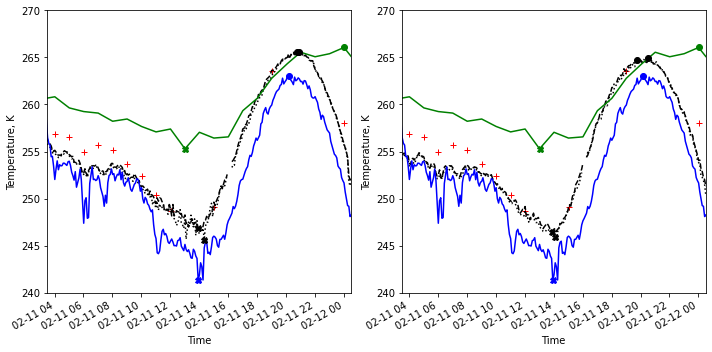

In [118]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=1, ncols= 2, figsize=(10,5), tight_layout=True)

[axA17, axA16] = axs.ravel()

# Pixel A


# GOES-16
pixelA_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axA16, label='GOES-16 LST')
pixelA_g16_rad.b13_tb_2km.plot(ax=axA16, c='k', linestyle='--', label='GOES-16 ABI b13 $T_B$')
pixelA_g16_rad.b14_tb_2km.plot(ax=axA16, c='k', linestyle=':',  label='GOES-16 ABI b14 $T_B$')
df_merged.rad_avg.plot(ax=axA16, c='b', label='In Situ $T_S$')
df_merged.AirTC_20ft_Avg.plot(ax=axA16, c='g', label='In Situ $T_A$')
axA16.plot([np.datetime64(g16_time_of_max_b13_tb[0])], [g16_b13_tb_max], c='k', linestyle='none', marker='o')
axA16.plot([np.datetime64(g16_time_of_min_b13_tb[0])], [g16_b13_tb_min], c='k', linestyle='none', marker='X')
axA16.plot([np.datetime64(g16_time_of_max_b14_tb[0])], [g16_b14_tb_max], c='k', linestyle='none', marker='o')
axA16.plot([np.datetime64(g16_time_of_min_b14_tb[0])], [g16_b14_tb_min], c='k', linestyle='none', marker='X')


# GOES-17
pixelA_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axA17, label='GOES-17 LST')
pixelA_g17_rad.b13_tb_2km.plot(ax=axA17, c='k', linestyle='--', label='GOES-17 ABI b13 $T_B$')
pixelA_g17_rad.b14_tb_2km.plot(ax=axA17, c='k', linestyle=':',  label='GOES-17 ABI b14 $T_B$')
df_merged.rad_avg.plot(ax=axA17, c='b', label='In Situ $T_S$')
df_merged.AirTC_20ft_Avg.plot(ax=axA17, c='g', label='In Situ $T_A$')
axA17.plot([np.datetime64(g17_time_of_max_b13_tb[0])], [g17_b13_tb_max], c='k', linestyle='none', marker='o')
axA17.plot([np.datetime64(g17_time_of_min_b13_tb[0])], [g17_b13_tb_min], c='k', linestyle='none', marker='X')
axA17.plot([np.datetime64(g17_time_of_max_b14_tb[0])], [g17_b14_tb_max], c='k', linestyle='none', marker='o')
axA17.plot([np.datetime64(g17_time_of_min_b14_tb[0])], [g17_b14_tb_min], c='k', linestyle='none', marker='X')


# formatting
for this_ax in axs.ravel():
    this_ax.plot([np.datetime64(time_of_max_tss[0])], [tss_max], c='b', linestyle='none', marker='o')
    this_ax.plot([np.datetime64(time_of_min_tss[0])], [tss_min], c='b', linestyle='none', marker='X')
    this_ax.plot([np.datetime64(time_of_max_ta[0])], [ta_max], c='g', linestyle='none', marker='o')
    this_ax.plot([np.datetime64(time_of_min_ta[0])], [ta_min], c='g', linestyle='none', marker='X')
    this_ax.set_ylabel('Temperature, K')
    this_ax.set_xlabel('Time')
    this_ax.set_xlim(pd.Timestamp(starttime), pd.Timestamp(endtime))
    this_ax.set_ylim(240,270)
    #this_ax.legend(loc='lower right')
    
    
plt.savefig('abi_and_ground_timeline_feb11.jpg')

In [ ]:
#
#fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,14), tight_layout=True)
#
#[ax17_b13, ax16_b13, ax17_b14, ax16_b14, ax17_lst, ax16_lst] = axs.ravel()
#
#ax16_b13.plot(df_merged.AirTC_20ft_Avg, df_merged.pixelA_g16_rad_sliced_b13_tb_2km, '.k')
#ax16_b13.set_ylabel('GOES-16 b13 $T_B$, K')
#ax16_b13.set_xlabel('Air Temperature, K')
#ax16_b13.set_title('GOES-16 Band 13 Tb')
#
#ax16_b14.plot(df_merged.AirTC_20ft_Avg, df_merged.pixelA_g16_rad_sliced_b14_tb_2km, '.k')
#ax16_b14.set_ylabel('GOES-16 b14 $T_B$, K')
#ax16_b14.set_xlabel('Air Temperature, K')
#ax16_b14.set_title('GOES-16 Band 14 Tb')
#
#ax16_lst.plot(df_merged_g16_lst_sliced.AirTC_20ft_Avg[idx16 != -1], pixelA_g16_lst.LST[idx16 != -1], '.k')
#ax16_lst.set_ylabel('GOES-16 LST, K')
#ax16_lst.set_xlabel('Air Temperature, K')
#ax16_lst.set_title('GOES-16 LST')
#
#ax17_b13.plot(df_merged.AirTC_20ft_Avg, df_merged.pixelA_g17_rad_sliced_b13_tb_2km, '.k')
#ax17_b13.set_ylabel('GOES-17 b13 $T_B$, K')
#ax17_b13.set_xlabel('Air Temperature, K')
#ax17_b13.set_title('GOES-17 Band 13 Tb')
#
#ax17_b14.plot(df_merged.AirTC_20ft_Avg, df_merged.pixelA_g17_rad_sliced_b14_tb_2km, '.k')
#ax17_b14.set_ylabel('GOES-17 b14 $T_B$, K')
#ax17_b14.set_xlabel('Air Temperature, K')
#ax17_b14.set_title('GOES-17 Band 14 Tb')
#
#ax17_lst.plot(df_merged_g17_lst_sliced.AirTC_20ft_Avg[idx17 != -1], pixelA_g17_lst.LST[idx17 != -1], '.k')
#ax17_lst.set_ylabel('GOES-17 LST, K')
#ax17_lst.set_xlabel('Air Temperature, K')
#ax17_lst.set_title('GOES-17 LST')
#
#for this_ax in axs.ravel():
#    # stats
#    text_x, text_y = 255.5, 272.5
#    x = this_ax.get_lines()[0].get_xdata()
#    y = this_ax.get_lines()[0].get_ydata()
#    stats_dict = summary_stats(x, y)
#    s1 = str(np.round(stats_dict['r_squared'],2))
#    s2 = str(np.round(stats_dict['mean_diff'],2))
#    s3 = str(np.round(stats_dict['rms_diff'],2))
#    this_ax.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}', fontsize=12)
#    # formatting
#    ax_min, ax_max = 255, 275
#    this_ax.plot([ax_min, ax_max], [ax_min, ax_max], '-k')
#    this_ax.set_xlim((ax_min, ax_max))
#    this_ax.set_ylim((ax_min, ax_max))
#    